In [10]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models, optimizers, losses, metrics, activations
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import time
rand_seed = int(time.time())
data_file = 'spiral.csv'

In [5]:
np.random.seed(rand_seed)
tf.set_random_seed(rand_seed)

In [8]:
import urllib
url = "https://raw.githubusercontent.com/madewithml/lessons/master/data/spiral.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open(data_file, 'wb') as fp:
    fp.write(html)

In [11]:
df = pd.read_csv(data_file)

In [16]:
X = df[['X1', 'X2']].values
y = df[['color']].values

In [23]:
from sklearn.preprocessing import LabelEncoder
y_encoder = LabelEncoder()
y = y.ravel()
y_encoder.fit(y)
y_samples = y_encoder.transform(y)

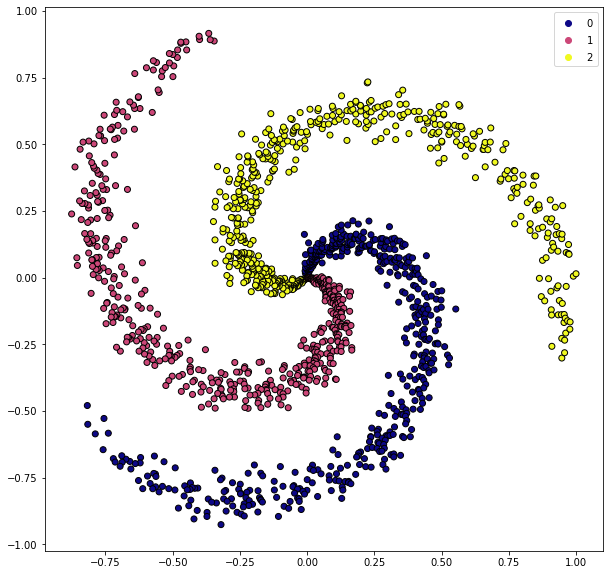

In [57]:
plt.figure(figsize=(10, 10))
scatter_colors = {'c1': 'red', 'c2': 'blue', 'c3': 'aqua'}
hdl = plt.scatter(X[:, 0], X[:, 1], c=y_samples, cmap='plasma', edgecolors='black')
plt.legend(handles=hdl.legend_elements()[0], labels=hdl.legend_elements()[1], scatterpoints=1)
plt.show()


# Preprocessing

In [58]:
from ml_utils import train_validate_test_split

In [59]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = train_validate_test_split(X, y_samples)

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
x_scaler = StandardScaler()
x_train = x_scaler.fit_transform(x_train)
x_val = x_scaler.transform(x_val)
x_test = x_scaler.transform(x_test)

In [68]:
num_output = len(y_encoder.classes_)